In [1]:
import scipy
import numpy
import pyamg
import matplotlib.pyplot as plt

In [2]:
# create a stencil and matrix
stencil = [[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]
A = pyamg.gallery.stencil_grid(stencil, (1000, 1000), dtype=float, format='csr')

In [3]:
print(f'Number of nonzeros: {A.nnz} \n'
      f'Shape of the matrix: {A.shape[0]} x {A.shape[1]} \n'
      f'Format of the matrix: {A.format}\n')

Number of nonzeros: 8988004 
Shape of the matrix: 1000000 x 1000000 
Format of the matrix: csr



In [4]:
Agg = pyamg.aggregation.standard_aggregation(A)

In [5]:
B = numpy.ones((A.shape[0], 1))
ml = pyamg.smoothed_aggregation_solver(A, B, max_coarse=10)

In [6]:
print(ml)

multilevel_solver
Number of Levels:     7
Operator Complexity:  1.125
Grid Complexity:      1.126
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0      1000000      8988004 [88.87%]
    1       111556      1000000 [ 9.89%]
    2        12544       111556 [ 1.10%]
    3         1444        12544 [ 0.12%]
    4          169         1369 [ 0.01%]
    5           25          169 [ 0.00%]
    6            4           16 [ 0.00%]



In [7]:
# initialize a place-holder for the residual history, a rhs, and an initial guess
residuals = []
b = numpy.random.rand(A.shape[0])
x0 = numpy.random.rand(A.shape[0])

In [8]:
x = ml.solve(b=b, x0=x0, tol=1e-10, residuals=residuals)

In [9]:
print((residuals[-1]/residuals[0])**(1.0/(len(residuals)-1)))

0.1290158452889298


In [12]:
# with CG acceleration
x = ml.solve(b=b, x0=x0, tol=1e-10, residuals=residuals, accel='cg')

In [11]:
print((residuals[-1]/residuals[0])**(1.0/(len(residuals)-1)))

0.033478043019831996


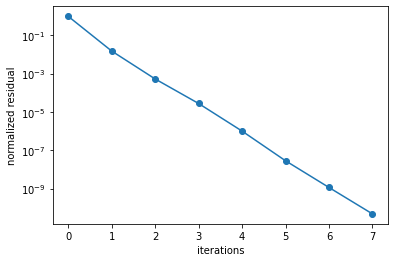

In [13]:
# plot the residual
plt.semilogy(residuals/residuals[0], 'o-')
plt.xlabel('iterations')
plt.ylabel('normalized residual')
plt.show()